In [79]:
import torch

In [80]:
import sys
sys.path.append('clustering/')
from utils import *
import os

In [140]:
checkpoint = torch.load(os.path.join(get_data_dir(), '2010s', 'BERT/checkpoint-epoch=2_min_count_50.ckpt'))

data_dir:  /home/lyuzhuoqi/projects/clustering/data


/tmp/ipykernel_1323286/3581299288.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(os.path.join(get_data_dir(), '2010s', 'BERT/checkpoint-epoch=2_

In [141]:
checkpoint['state_dict'].keys()

odict_keys(['model.roberta.embeddings.word_embeddings.weight', 'model.roberta.embeddings.position_embeddings.weight', 'model.roberta.embeddings.token_type_embeddings.weight', 'model.roberta.embeddings.LayerNorm.weight', 'model.roberta.embeddings.LayerNorm.bias', 'model.roberta.encoder.layer.0.attention.self.query.weight', 'model.roberta.encoder.layer.0.attention.self.query.bias', 'model.roberta.encoder.layer.0.attention.self.key.weight', 'model.roberta.encoder.layer.0.attention.self.key.bias', 'model.roberta.encoder.layer.0.attention.self.value.weight', 'model.roberta.encoder.layer.0.attention.self.value.bias', 'model.roberta.encoder.layer.0.attention.output.dense.weight', 'model.roberta.encoder.layer.0.attention.output.dense.bias', 'model.roberta.encoder.layer.0.attention.output.LayerNorm.weight', 'model.roberta.encoder.layer.0.attention.output.LayerNorm.bias', 'model.roberta.encoder.layer.0.intermediate.dense.weight', 'model.roberta.encoder.layer.0.intermediate.dense.bias', 'model.ro

In [142]:
checkpoint['state_dict']['model.roberta.embeddings.word_embeddings.weight'].shape

torch.Size([37596, 768])

In [144]:
import pickle
with open(os.path.join(get_data_dir(), '2010s', 'BERT', 'pid_to_idx_min_count_50.pkl'), 'rb') as f:
    pid_to_idx = pickle.load(f)
pid_to_idx

data_dir:  /home/lyuzhuoqi/projects/clustering/data


{'<pad>': 0,
 '<mask>': 1,
 0: 2,
 61661: 3,
 81127: 4,
 146206: 5,
 146344: 6,
 161885: 7,
 182001: 8,
 229566: 9,
 234478: 10,
 235346: 11,
 255146: 12,
 260102: 13,
 261554: 14,
 267729: 15,
 282835: 16,
 284573: 17,
 285199: 18,
 316438: 19,
 323237: 20,
 331060: 21,
 336866: 22,
 356733: 23,
 357931: 24,
 362129: 25,
 387551: 26,
 402139: 27,
 406924: 28,
 412057: 29,
 414566: 30,
 445011: 31,
 452692: 32,
 453935: 33,
 454503: 34,
 464037: 35,
 465895: 36,
 473813: 37,
 481605: 38,
 487226: 39,
 500190: 40,
 524341: 41,
 531269: 42,
 548917: 43,
 559566: 44,
 568598: 45,
 579031: 46,
 587692: 47,
 603496: 48,
 607880: 49,
 611060: 50,
 630694: 51,
 640450: 52,
 658968: 53,
 660994: 54,
 661825: 55,
 678965: 56,
 710002: 57,
 720488: 58,
 728652: 59,
 733369: 60,
 744042: 61,
 766161: 62,
 782382: 63,
 802930: 64,
 810424: 65,
 815301: 66,
 836864: 67,
 883815: 68,
 889322: 69,
 896049: 70,
 896174: 71,
 900338: 72,
 920941: 73,
 927508: 74,
 945443: 75,
 955875: 76,
 961603: 77,


In [145]:
from sklearn.manifold import TSNE
emb_2d = TSNE(n_components=2).fit_transform(checkpoint['state_dict']['model.roberta.embeddings.word_embeddings.weight'].detach().cpu().numpy())

In [146]:
import pandas as pd
plot_df = pd.DataFrame(emb_2d, columns=['x', 'y'])
plot_df['vid'] = list(pid_to_idx.keys())
plot_df.drop(plot_df[plot_df['vid'].isin(['<pad>', '<mask>'])].index, inplace=True)
plot_df = plot_df.merge(pd.read_parquet(os.path.join(get_data_dir(), 'MAG_venue.parquet'))[['OriginalVenue', 'VenueType']], left_on='vid', right_index=True)
plot_df.rename(columns={'OriginalVenue': 'venue', 'VenueType': 'type'}, inplace=True)
plot_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,x,y,vid,venue,type
3,-18.658167,-73.457649,61661,Journal of Prosthodontics,Journal
4,-61.788322,-28.492018,81127,European Heart Journal Supplements,Journal
5,-65.649361,-8.092370,146206,Journal of Carcinogenesis,Journal
6,-8.981753,-14.926984,146344,Journal of Marriage and Family,Journal
7,68.733177,-38.709145,161885,Chinese Studies in History,Journal
...,...,...,...,...,...
37591,-5.719560,-34.988869,3207271027,The Educational and Developmental Psychologist,Journal
37592,38.865490,-17.234726,3207369193,Journal of First-generation Student Success,Journal
37593,18.352161,-26.196201,3207474444,Journal of Statistics and Data Science Education,Journal
37594,61.971848,-23.429373,3207635824,Journal of LGBTQ Issues in Counseling,Journal


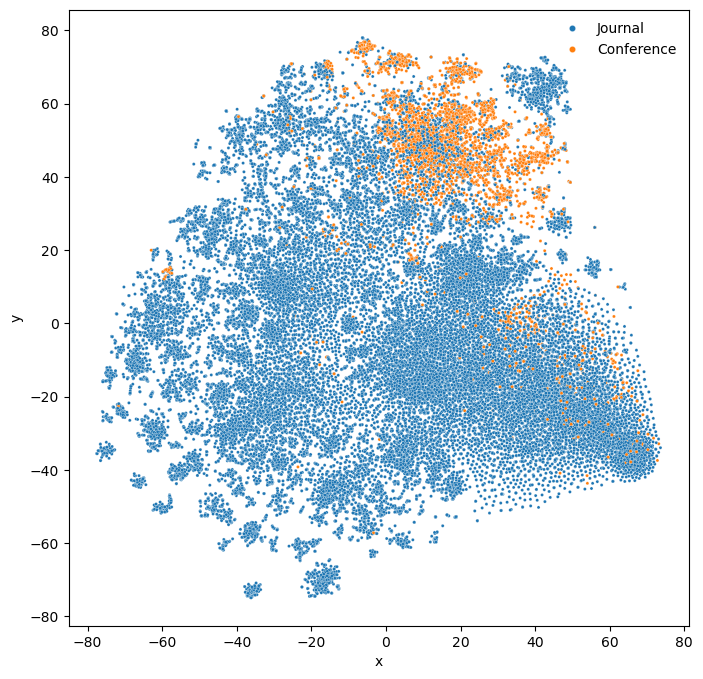

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(data=plot_df, x='x', y='y', hue='type', s=5)
plt.legend(frameon=False, markerscale=2)

In [148]:
cluster_df = pd.read_parquet(os.path.join(get_data_dir(), '2010s', 'clustering_results', 'cluster_df.parquet'))
plot_df = plot_df.merge(cluster_df['Scopus_label'], left_on='vid', right_index=True)
plot_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,x,y,vid,venue,type,Scopus_label
3,-18.658167,-73.457649,61661,Journal of Prosthodontics,Journal,Dentistry
4,-61.788322,-28.492018,81127,European Heart Journal Supplements,Journal,Medicine
5,-65.649361,-8.092370,146206,Journal of Carcinogenesis,Journal,Medicine
6,-8.981753,-14.926984,146344,Journal of Marriage and Family,Journal,Social Sciences
7,68.733177,-38.709145,161885,Chinese Studies in History,Journal,Arts and Humanities
...,...,...,...,...,...,...
37588,-17.436222,-48.742359,3206652469,Dialogues in Clinical Neuroscience,Journal,Medicine
37590,-15.455012,-34.181450,3207227496,Journal of the International Society of Sports...,Journal,Nursing
37591,-5.719560,-34.988869,3207271027,The Educational and Developmental Psychologist,Journal,Psychology
37593,18.352161,-26.196201,3207474444,Journal of Statistics and Data Science Education,Journal,Social Sciences


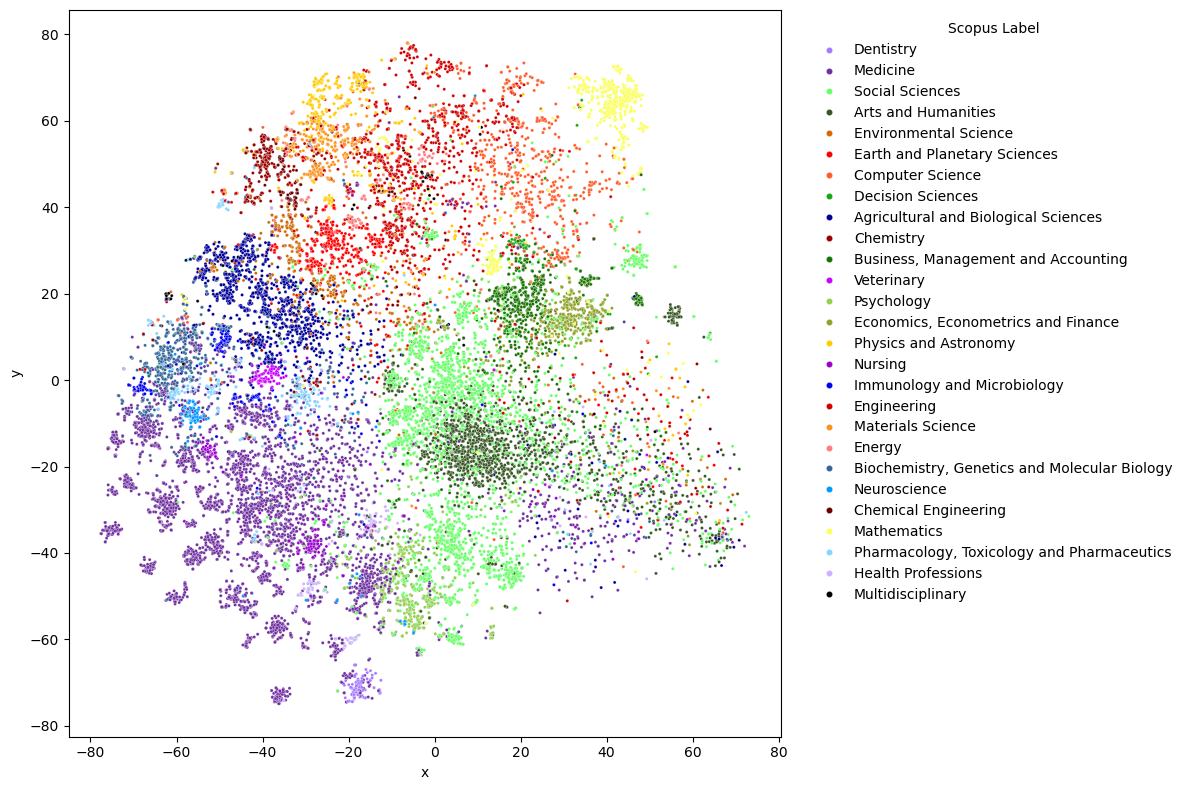

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
fig = plt.figure(figsize=(12, 8))

# Create the main scatter plot in the left part
ax_scatter = plt.subplot2grid((1, 5), (0, 0), colspan=4)
scatter = sns.scatterplot(data=plot_df, x='x', y='y', s=5, hue='Scopus_label', palette=Scopus2color, ax=ax_scatter)
ax_scatter.legend_.remove()  # Remove the legend from the scatter plot

# Create a separate axis for the legend on the right
ax_legend = plt.subplot2grid((1, 5), (0, 4))
handles, labels = scatter.get_legend_handles_labels()
ax_legend.legend(handles, labels, title='Scopus Label', frameon=False,
                 bbox_to_anchor=(0, 1), loc='upper left', markerscale=2)
ax_legend.axis('off')  # Hide the axis

plt.tight_layout()

In [150]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=26, random_state=42).fit(checkpoint['state_dict']['model.roberta.embeddings.word_embeddings.weight'].detach().cpu().numpy())
kmeans.labels_

array([23, 18, 12, ...,  7,  3, 18], dtype=int32)

In [151]:
import pandas as pd

bert_kmeans_df = pd.DataFrame(kmeans.labels_, columns=['bert_kmeans_label'])
bert_kmeans_df['vid'] = list(pid_to_idx.keys())
bert_kmeans_df.drop(bert_kmeans_df[bert_kmeans_df['vid'].isin(['<pad>', '<mask>'])].index, inplace=True)
bert_kmeans_df = bert_kmeans_df.merge(pd.read_parquet(os.path.join(get_data_dir(), 'MAG_venue.parquet'))[['OriginalVenue', 'VenueType']], left_on='vid', right_index=True)
bert_kmeans_df.rename(columns={'OriginalVenue': 'venue', 'VenueType': 'type'}, inplace=True)
bert_kmeans_df.set_index('vid', inplace=True)
bert_kmeans_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,bert_kmeans_label,venue,type
vid,,,
61661,2,Journal of Prosthodontics,Journal
81127,21,European Heart Journal Supplements,Journal
146206,8,Journal of Carcinogenesis,Journal
146344,1,Journal of Marriage and Family,Journal
161885,23,Chinese Studies in History,Journal
...,...,...,...
3207271027,17,The Educational and Developmental Psychologist,Journal
3207369193,3,Journal of First-generation Student Success,Journal
3207474444,7,Journal of Statistics and Data Science Education,Journal


In [152]:
cluster_df = pd.read_parquet(os.path.join(get_data_dir(), '2010s', 'clustering_results', 'cluster_df.parquet'))
cluster_df = cluster_df.merge(bert_kmeans_df['bert_kmeans_label'], left_index=True, right_index=True)
cluster_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,18
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,8
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,8
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,18
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,23
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,23
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,23
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,23


In [153]:
cluster_df.to_parquet(os.path.join(get_data_dir(), '2010s', 'clustering_results', 'cluster_df.parquet'))

data_dir:  /home/lyuzhuoqi/projects/clustering/data
